# Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



 ## Create a DataFrame from the dataset

In [2]:
# Class 0 data (Feature 1, Feature 2)
class_0 = np.array([[2.5, 3.0], [3.1, 2.9], [2.8, 3.2], [3.0, 3.1], [2.9, 3.3]])

# Class 1 data (Feature 1, Feature 2)
class_1 = np.array([[4.1, 3.5], [4.3, 3.6], [4.2, 3.7], [4.0, 3.4], [3.9, 3.8]])

# Create DataFrame
data = pd.DataFrame(np.vstack([class_0, class_1]), columns=["Feature 1", "Feature 2"])
data['Class'] = [0] * 5 + [1] * 5  # Adding class labels (0 for class 0, 1 for class 1)

print(data)


   Feature 1  Feature 2  Class
0        2.5        3.0      0
1        3.1        2.9      0
2        2.8        3.2      0
3        3.0        3.1      0
4        2.9        3.3      0
5        4.1        3.5      1
6        4.3        3.6      1
7        4.2        3.7      1
8        4.0        3.4      1
9        3.9        3.8      1


- We used numpy to create arrays for each class's data points.

- The pd.DataFrame method is used to convert the numpy arrays into a DataFrame for easier manipulation.

- The Class column is added to label the data points of each class.

## Compute the Mean Vectors for Both Classes

In [3]:
# Compute the mean vectors for both classes
mean_class_0 = np.mean(class_0, axis=0)  # Mean of Class 0
mean_class_1 = np.mean(class_1, axis=0)  # Mean of Class 1

print("Mean of Class 0:", mean_class_0)
print("Mean of Class 1:", mean_class_1)


Mean of Class 0: [2.86 3.1 ]
Mean of Class 1: [4.1 3.6]


- np.mean calculates the mean across the specified axis (axis=0 means along columns, i.e., the features).

- The mean vectors are the centroids of each class in the feature space.

## Calculate the Within-Class Scatter Matrix (SW) and the Between-Class Scatter Matrix (SB)

In [4]:
# Calculate the overall mean (mu)
overall_mean = np.mean(np.vstack([class_0, class_1]), axis=0)

# Calculate within-class scatter matrix SW
SW = np.zeros((2, 2))
for x in class_0:
    SW += np.outer(x - mean_class_0, x - mean_class_0)
for x in class_1:
    SW += np.outer(x - mean_class_1, x - mean_class_1)

# Calculate between-class scatter matrix SB
N_0 = class_0.shape[0]
N_1 = class_1.shape[0]

SB = N_0 * np.outer(mean_class_0 - overall_mean, mean_class_0 - overall_mean) + \
     N_1 * np.outer(mean_class_1 - overall_mean, mean_class_1 - overall_mean)

print("Within-class scatter matrix SW:\n", SW)
print("Between-class scatter matrix SB:\n", SB)


Within-class scatter matrix SW:
 [[ 0.312 -0.02 ]
 [-0.02   0.2  ]]
Between-class scatter matrix SB:
 [[3.844 1.55 ]
 [1.55  0.625]]


- The within-class scatter matrix (SW) is computed by summing the outer products of the deviations of each data point from the class mean.

- The between-class scatter matrix (SB) is computed by multiplying the number of data points in each class by the outer product of the deviation of the class mean from the overall mean.

## Find and Sort the Eigenvalues and Eigenvectors

In [5]:
# Calculate the inverse of SW
SW_inv = np.linalg.inv(SW)

# Compute the eigenvalues and eigenvectors of SW_inv * SB
eigenvalues, eigenvectors = np.linalg.eig(SW_inv @ SB)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

print("Eigenvalues:\n", eigenvalues_sorted)
print("Eigenvectors:\n", eigenvectors_sorted)


Eigenvalues:
 [ 1.65451613e+01 -4.44089210e-16]
Eigenvectors:
 [[ 0.81893357 -0.37396834]
 [ 0.57388833  0.92744147]]


- The matrix is used to compute the eigenvalues and eigenvectors.

- We use np.linalg.eig to compute the eigenvalues and eigenvectors of the matrix.

- np.argsort is used to sort the eigenvalues in descending order and to rearrange the eigenvectors accordingly.

## Project the Data onto the Lower-Dimensional Space

In [6]:
# Select the eigenvector corresponding to the largest eigenvalue
eigenvector_selected = eigenvectors_sorted[:, 0]

# Project the data onto the eigenvector
data_projected = np.dot(np.vstack([class_0, class_1]), eigenvector_selected)

# Create DataFrame for the projected data
data_projected_df = pd.DataFrame(data_projected, columns=["Projected Data"])
data_projected_df['Class'] = [0] * 5 + [1] * 5

print(data_projected_df)


   Projected Data  Class
0        3.768999      0
1        4.202970      0
2        4.129457      0
3        4.235855      0
4        4.268739      0
5        5.366237      1
6        5.587412      1
7        5.562908      1
8        5.226955      1
9        5.374617      1


- We select the eigenvector corresponding to the largest eigenvalue (first column in eigenvectors_sorted).

- The data is projected by taking the dot product of the data points and the selected eigenvector

##  Create a 2D Scatter Plot of the Projected Data

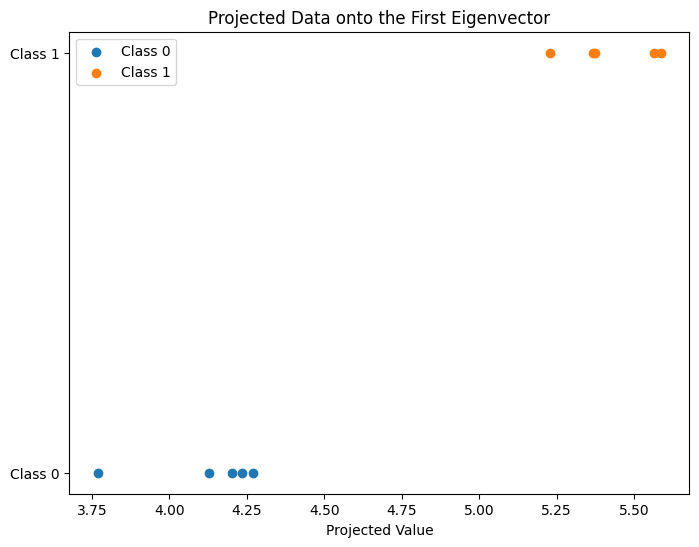

In [8]:
# Plot the projected data
plt.figure(figsize=(8, 6))
for class_label in [0, 1]:
    plt.scatter(data_projected_df[data_projected_df['Class'] == class_label].iloc[:, 0],
                [class_label] * len(data_projected_df[data_projected_df['Class'] == class_label]),
                label=f'Class {class_label}')

plt.title("Projected Data onto the First Eigenvector")
plt.xlabel("Projected Value")
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.legend()
plt.show()


- We plot the projected data along the x-axis and use different y-values for each class (Class 0 and Class 1) to distinguish the points.

- plt.scatter is used to plot the data points, and plt.legend helps to label the classes